### Problem Statement


In a competitive market like the restaurant industry, understanding the factors that influence business success is crucial for stakeholders. Utilizing the Yelp dataset, this project aims to investigate the relationship between user engagement (reviews, tips, and check-ins) and business success metrics (review count, ratings) for restaurants.


### Research Objectives

1. Quantify the correlation between user engagement (reviews, tips, check-ins) and review count/average star rating: This will help us determine if restaurants with higher user engagement experience a corresponding increase in reviews and ratings.

2. Analyze the impact of sentiment on review count and average star rating: We will investigate if positive sentiment in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.

3. Time trends in User Engagement: We will explore if consistent user engagement over time is a stronger indicator of long-term success compared to sporadic bursts of activity.

### Hypothesis Testing

Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants. The positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants

Consistent engagement over time is positively associated with sustained business success for restaurants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import mysql.connector
from mysql.connector import Error
from sqlalchemy import create_engine
import sqlite3
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

- This data set is a subset of Yelp and has information about businesses across 8 metropolitan areas in the USA and Canada.
- The original data is shared by Yelp as Json files.
- These 5 Jason files are business, review, user, tip, and checkin.
- The Jason files are stored in the database for easy retrieval of data.

### DATABASE CONNECTION

In [2]:
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            username = 'root',
            password = 'nidhi#B2727',
            host = 'localhost',
            port = '3306',
            database = 'yelp_db'

        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    
    return connection

conn = create_connection("localhost", "root", "nidhi#B2727", "yelp_db")


Connection to MySQL DB successful


In [3]:
db_username = 'root'
db_password = 'nidhi#B2727'
db_host = 'localhost'
db_port = '3306'
db_name = 'yelp_db'

# Create an engine with your database credentials
engine = create_engine(f"mysql+mysqlconnector://{'root'}:{'nidhi#B2727'}@{'localhost'}:{3306}/{'yelp_db'}")

In [4]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

def fetch_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [5]:
query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'yelp_db'"

In [6]:
tables = pd.read_sql_query(query, engine)
print(tables)

  TABLE_NAME
0   business
1    checkin
2     review
3        tip
4       user


In [7]:
business = "SELECT * FROM business"
checkin = "SELECT * FROM checkin"
review = "SELECT * FROM review"
tip = "SELECT * FROM tip"
user = "SELECT * FROM user"

In [8]:
business_df = pd.read_sql(business, engine)

In [9]:
print(business_df.shape)

(150346, 12)


In [10]:
checkin_df = pd.read_sql(checkin, engine)

In [15]:
print(checkin_df.shape)

(131930, 2)


In [13]:
review_df = pd.read_sql(review, engine)

In [14]:
print(review_df.shape)

(6990280, 9)


In [11]:
tip_df = pd.read_sql(tip, engine)

In [12]:
print(tip_df.shape)

(908915, 5)


In [24]:
user_df = pd.read_sql(user, engine)

In [25]:
print(user_df.shape)

(1987897, 22)


In [8]:
for table in tables:
    display(pd.read_sql_query(f"SELECT * from business limit 5", conn))

for table in tables:
    display(pd.read_sql_query(f"SELECT * from checkin limit 5", conn))

for table in tables:
    display(pd.read_sql_query(f"SELECT * from review limit 5", conn))

for table in tables:
    display(pd.read_sql_query(f"SELECT * from tip limit 5", conn))

for table in tables:
    display(pd.read_sql_query(f"SELECT * from user limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


### Data Analysis

In [9]:
pd.read_sql_query("select count(*) from business", conn)

,count(*)
0,150346


In [10]:
business_id = pd.read_sql_query("""select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open = 1""", conn)

Out of 150k businesses, 35k are restaurant businesses and are open.

In [11]:
# What is the descriptive stats for review count and star rating for business?
# avg, min, max

pd.read_sql_query(f"""select 
  avg(review_count) as average_review_count, 
  min(review_count) as min_review_count, 
  max(review_count) as max_review_count,

  avg(stars) as average_star_rating,
  min(stars) as min_star_rating,
  max(stars) as max_star_rating

  
from business 
where business_id IN {tuple(business_id['business_id'])};
""" ,conn).transpose()

,0
average_review_count,104.097800
min_review_count,5.000000
max_review_count,7568.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000


In [12]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [13]:
business_id = remove_outliers(business_id, 'review_count')

In [14]:
business_id.shape

(31537, 2)

In [15]:
pd.read_sql_query(f"""select 
  avg(review_count) as average_review_count, 
  min(review_count) as min_review_count, 
  max(review_count) as max_review_count,

  avg(stars) as average_star_rating,
  min(stars) as min_star_rating,
  max(stars) as max_star_rating

  
from business 
where business_id IN {tuple(business_id['business_id'])};
""" ,conn).transpose()

,0
average_review_count,55.975400
min_review_count,5.000000
max_review_count,248.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000


- After removing outliers, now we are getting average review counts as 55 for the restaurants business

In [16]:
# Which restaurants have the highest number of reviews?

pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])} 
group by name
order by review_count desc
limit 10""", conn)

,name,review_count,avg_rating
0,McDonald's,16490.0,1.868702
1,Chipotle Mexican Grill,9071.0,2.381757
2,Taco Bell,8017.0,2.141813
3,Chick-fil-A,7711.0,3.369427
4,First Watch,6761.0,3.875000
5,Panera Bread,6613.0,2.661905
6,Buffalo Wild Wings,6483.0,2.344828
7,Domino's Pizza,6091.0,2.290210
8,Wendy's,5930.0,2.030159
9,Chili's,5754.0,2.500000


In [17]:
# Which restaurants have the highest rating?

pd.read_sql_query(f"""select name, sum(review_count) as review_count, avg(stars) as avg_rating
from business
where business_id in {tuple(business_id['business_id'])} 
group by name
order by avg_rating desc
limit 10""", conn)

,name,review_count,avg_rating
0,Oat Bakery,123.0,5.0
1,Lian Hsing's,8.0,5.0
2,Jet City Espresso Hyde Park,152.0,5.0
3,American Express century and lounge,5.0,5.0
4,La Petite Iza,7.0,5.0
5,In and Out Express Food Market,5.0,5.0
6,European Flavors,11.0,5.0
7,bb.q Chicken - O'Fallon,42.0,5.0
8,The Kitchen Table,26.0,5.0
9,King Tut's,48.0,5.0


- No direct correlation: higher ratings do not guarantee a higher review count and vice versa.
- Review count reflects user engagement but not necessarily overall customer satisfaction or business performance.
- Success in the restaurant business is not solely determined by ratings or review counts.

In [18]:
# Do restaurants with higher engagement tend to have higher ratings?

pd.read_sql_query("""select business_id,
sum(length(date) - length(replace(date,',',''))+1) as checkin_count
from checkin
group by business_id
""", conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11.0
1,--0iUa4sNDFiZFrAdIWhZQ,10.0
2,--30_8IhuyMHbSOcNWd6DQ,2.0
3,--7PUidqRWpRSpXebiyxTg,10.0
4,--7jw19RH9JKXgFohspgQw,26.0
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67.0
131926,zznZqH9CiAznbkV6fXyHWA,1.0
131927,zzu6_r3DxBJuXcjnOYVdTw,23.0
131928,zzw66H6hVjXQEt0Js3Mo4A,2.0


In [19]:
pd.read_sql_query("""select business_id,
count(*) as tip_count
from tip
group by business_id
""", conn)

,business_id,tip_count
0,3uLgwr0qeCNMjKenHJwPGQ,46
1,QoezRbYQncpRqyrLH6Iqjg,54
2,MYoRNLb5chwjQe3c_k37Gg,1
3,hV-bABTK-glh5wj31ps_Jw,5
4,_uN0OudeJ3Zl_tf6nxg5ww,23
...,...,...
106188,iJ2DouXcIs0NwM9EdGlDZQ,1
106189,TIdijYW7GmQjeXAcf0ehBQ,1
106190,GzLCbUdoyIrkCVK4vB5NOQ,1
106191,0Ub8i_sMIOsa0jbXNzsl8A,1


In [20]:
review_count_df = pd.read_sql_query(f"""SELECT total.avg_rating as rating,
AVG(total.review_count) as avg_review_count, 
AVG(total.checkin_count) as avg_checkin_count, 
AVG(total.tip_count) as avg_tip_count
FROM
(SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', ''))+1) AS checkin_count,
    SUM(tip.tip_count)as tip_count
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id) as total
GROUP BY total.avg_rating
ORDER BY total.avg_rating desc
""", conn)

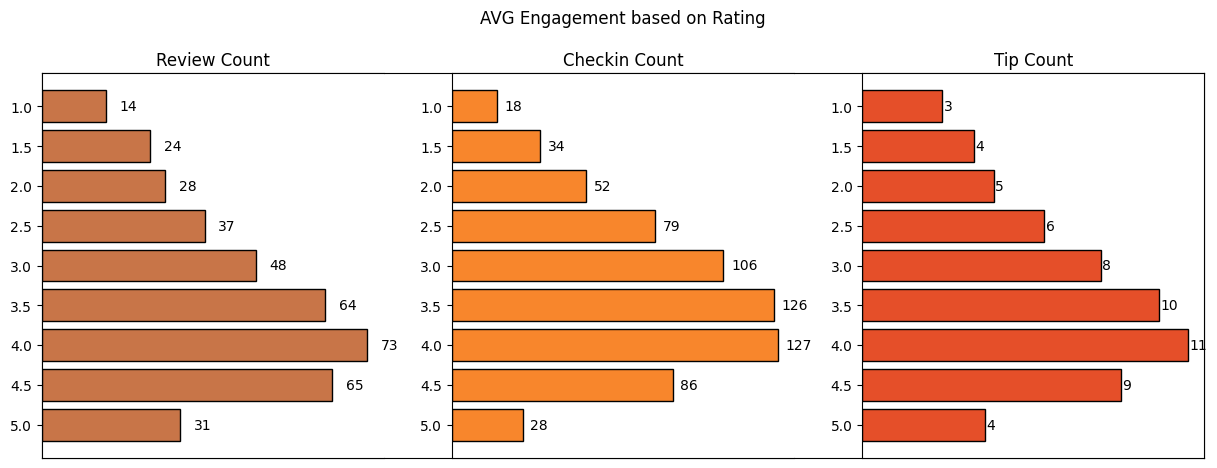

In [21]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df ['avg_review_count'], edgecolor = 'k', color = '#C87548')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3, i, str(round (value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,2)
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.title('Checkin Count')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round (value)), color= 'black', va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor = 'k',color ='#E54F29') 
for i, value in enumerate (review_count_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round (value)), color='black', va='center')
plt.xticks([]) 
plt.show()

- Data shows a general increase in average review, check-in, and tip counts as ratings improve from 1 to 4 stars.
- Restaurants rated 4 stars exhibit the highest engagement across reviews, check-ins, and tips, suggesting a peak in user interaction.
- Interestingly engagement metrics (review, check-in, tips) dip for restaurants rated 4.5 and significantly more at 5 stars.
- The drop in engagement at 5.0 stars might suggest either a saturation point where fewer customers feel compelled to add their reviews or a selectively where only a small, satisfied audience frequents these establishments.

In [22]:
# Is there a correlation between the number of reviews, tips, and check-ins for a business?

engagement_df = pd.read_sql_query(f"""SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', ''))+1) AS checkin_count,
    SUM(tip.tip_count)as tip_count,
    (CASE WHEN AVG(b.stars) >= 3.5 Then 'High-rated' Else 'Low-Rated' END) as category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
""", conn).dropna()

In [23]:
engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

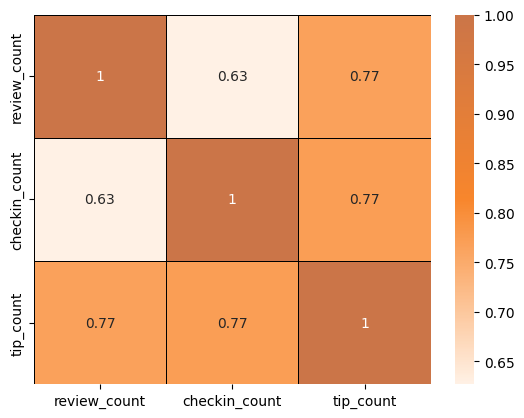

In [24]:
colors = ['#FFF1E5', '#F8862C', '#CB7548']
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidths=0.5, linecolor='black')

In [25]:
# Is there a difference in user engagement (reviews, tips, and check-ins) between high-rated and low-rated businesses?

engagement_df.groupby("category")[['review_count', 'tip_count', 'checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-rated,72.291062,10.162766,122.066641
Low-Rated,42.123420,6.541689,88.880828


- The data set shows a strong positive correlation among review counts, check-in counts, and tip counts.
- These correlations suggest that user engagement across different platforms (reviews, tips, and checkins) is interlinked higher activity in one area tends to be associated with higher activity in others.
- Businesses should focus on strategies that boost all types of user engagement, as increases in one type of engagement are likely to drive increases in others, enhancing overall visibility and interaction with customers.

In [26]:
# The function to calculate the success score based on the avg rating and total review count

def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [27]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities?

city_df = pd.read_sql_query(f"""select city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count,
count(*) as restaurant_count
from business
where business_id IN {tuple(business_id['business_id'])}
GROUP BY state, city
ORDER BY review_count desc
limit 10""", conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [28]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532312,175606.0,3002,42.656211
1,Tampa,FL,27.890814,-82.502346,3.568274,104751.0,1721,41.246934
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639.0,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.383885,91672.0,1421,38.664208
4,Nashville,TN,36.208102,-86.768170,3.491465,87100.0,1406,39.714800
5,New Orleans,LA,29.963974,-90.042604,3.694472,69309.0,1013,41.179856
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490.0,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479695,48569.0,591,37.548563
8,Edmonton,AB,53.436403,-113.604288,3.509367,45986.0,1548,37.676963
9,Boise,ID,43.611192,-116.206275,3.558824,36104.0,561,37.346958


- Philadelphia emerges as the top city with the highest success score, indicating a combination of high ratings and active user engagement.
- Following Philadelphia, Tampa, Indianapolis, and Tucson rank among the top cities with significant success scores suggesting thriving restaurant scenes in the areas.
- The success metrics vary significantly across different States and cities, highlighting regional differences in dining preferences, culinary scenes, and customer engagement levels.
- Identifying cities with high success scores presents opportunities for restaurant chains to expand or invest further, while areas with lower scores may require targeted efforts to improve ratings and increase user engagement.

In [29]:
# Create a base map

m = folium.Map(location=[city_df ['latitude'].mean(), city_df ['longitude'].mean()], zoom_start=4)

#Define a color scale
color_scale = folium. LinearColormap(colors=['green', 'yellow', '#E54F29'], 
                                     vmin=city_df ['success_score'].min(), 
                                     vmax=city_df ['success_score'].max())

#Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

#Add color scale to the map 
m.add_child(color_scale)

In [30]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT DATE_FORMAT(date, '%m-%Y') AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), DATE_FORMAT(tip.date, '%m-%Y') AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
ON tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip

ON review.month_year = tip.month_year
""", conn)

In [31]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [32]:
low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM
(SELECT DATE_FORMAT(date,'%m-%Y') AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), DATE_FORMAT(tip.date, '%m-%Y') AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
ON tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip

ON review.month_year = tip.month_year
;""", conn)

In [33]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [34]:
time_rating = pd.read_sql_query(f"""SELECT DATE_FORMAT(date, '%m-%Y') AS month_year, AVG(stars) AS avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
""", conn)

In [35]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [36]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']

In [37]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

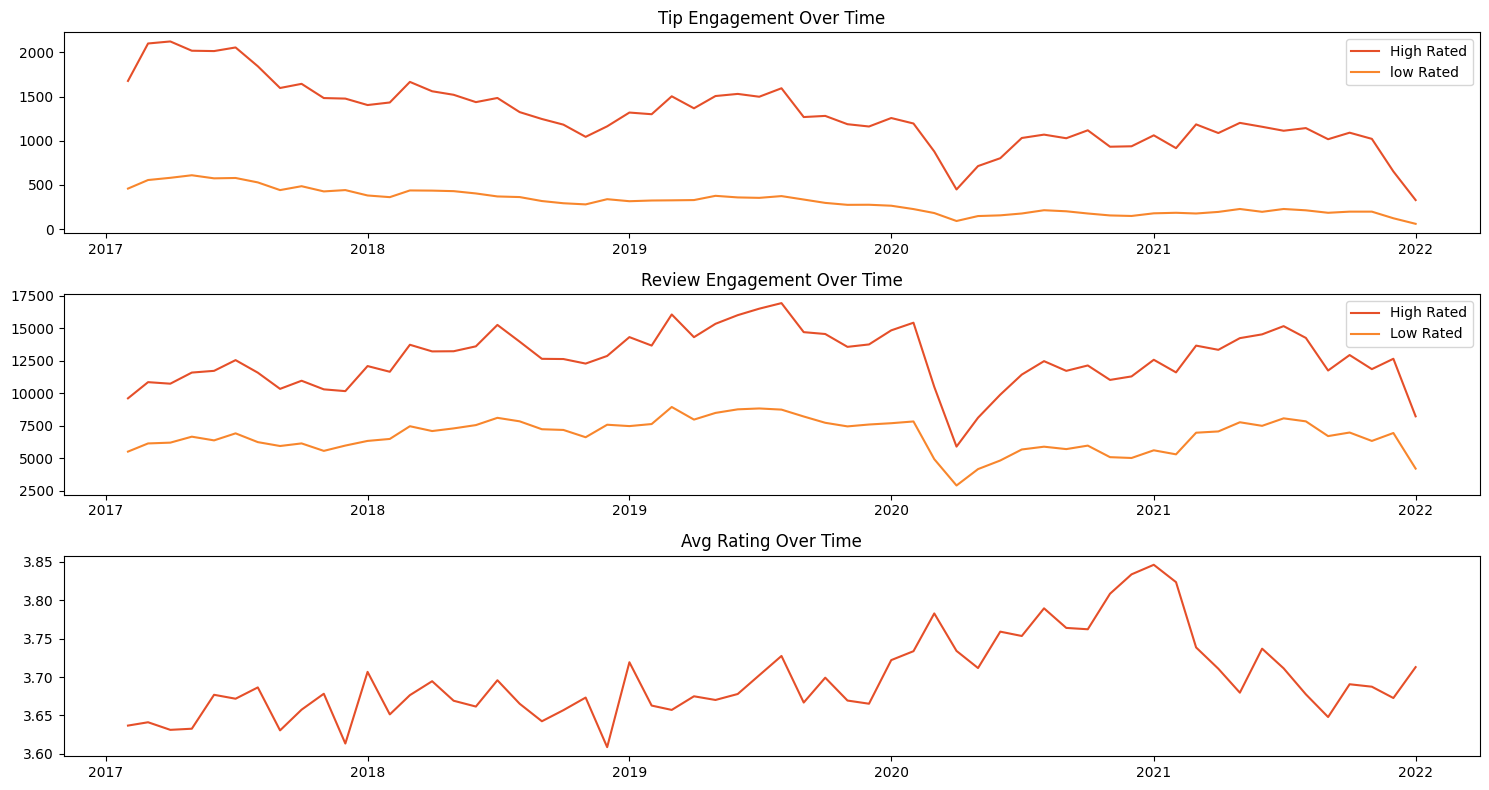

In [38]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['tip_count'], label ='High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'low Rated', color = '#F8862C')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29') 
plt.plot(low_rated_engagement['month_year'], low_rated_engagement ['review_count'], label = 'Low Rated', color='#F8862C')
plt.legend()
         
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29')

plt.tight_layout()
plt.show()

In [39]:
tip_high_rated = high_rated_engagement[['month_year' , 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year' , 'review_count']].set_index('month_year')
rating_df = time_rating[['month_year' , 'avg_rating']].set_index('month_year')

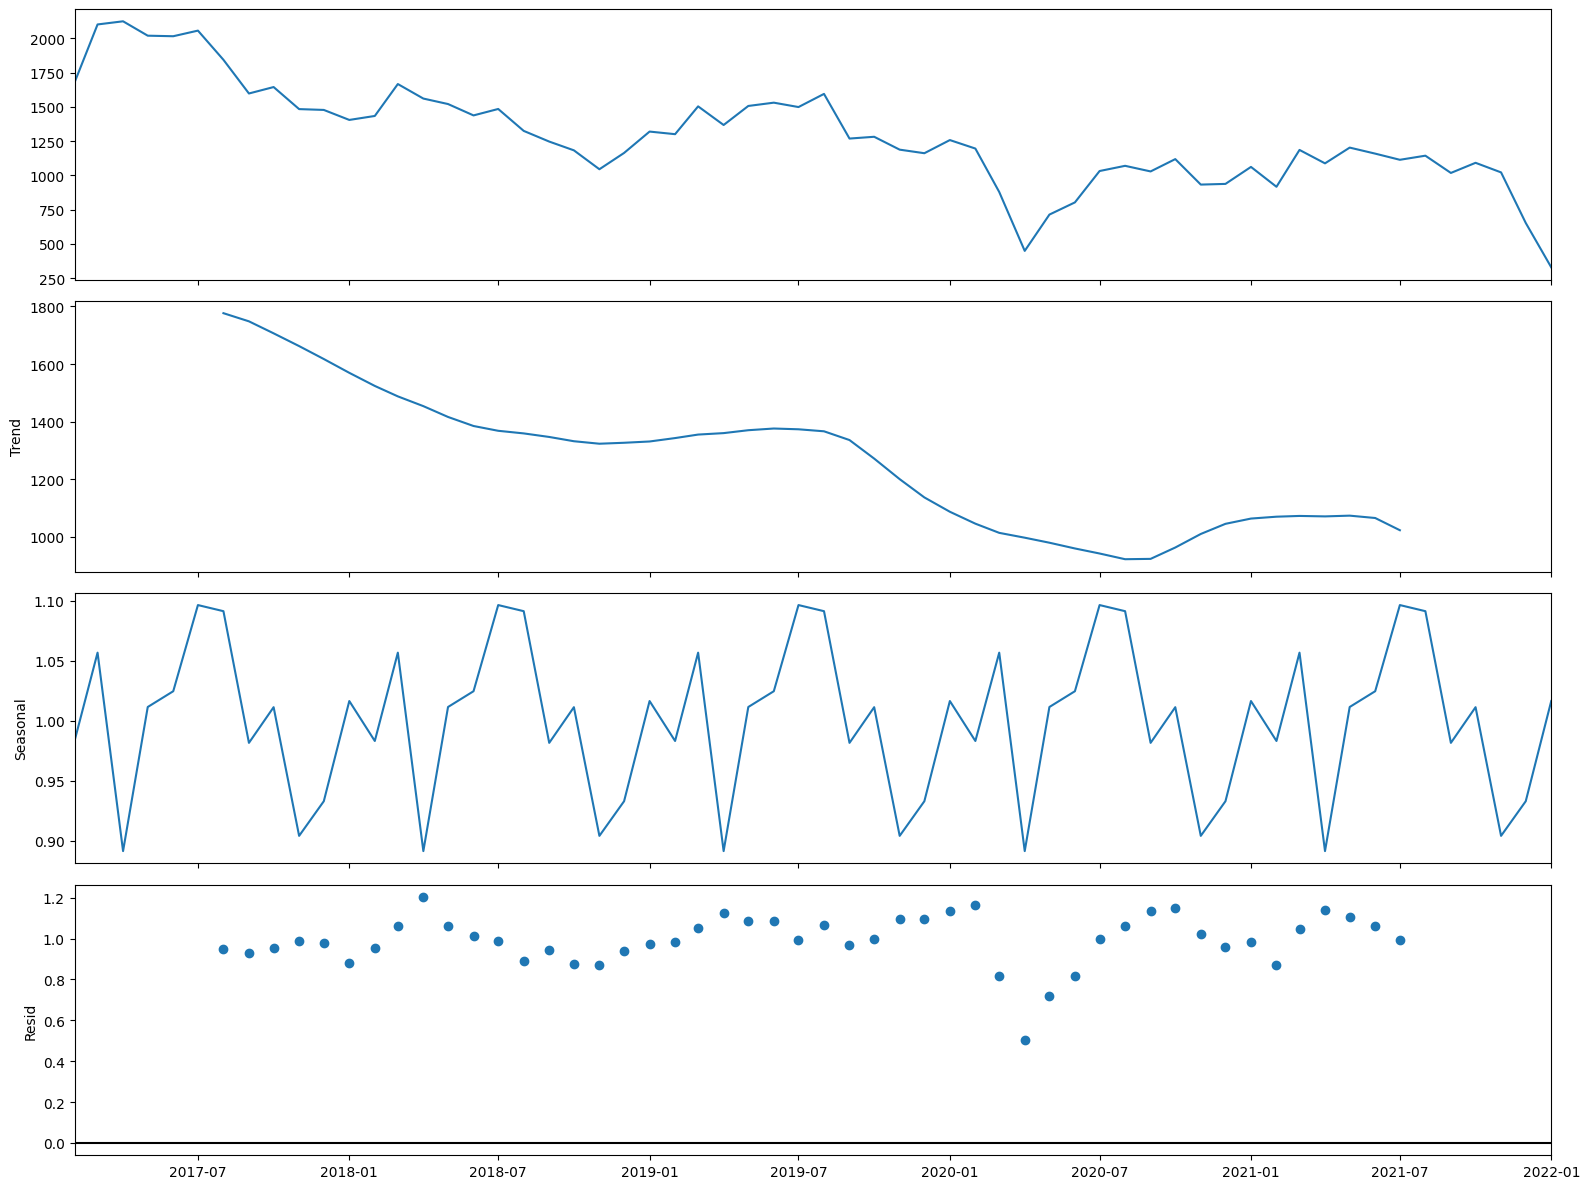

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                  model = 'multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

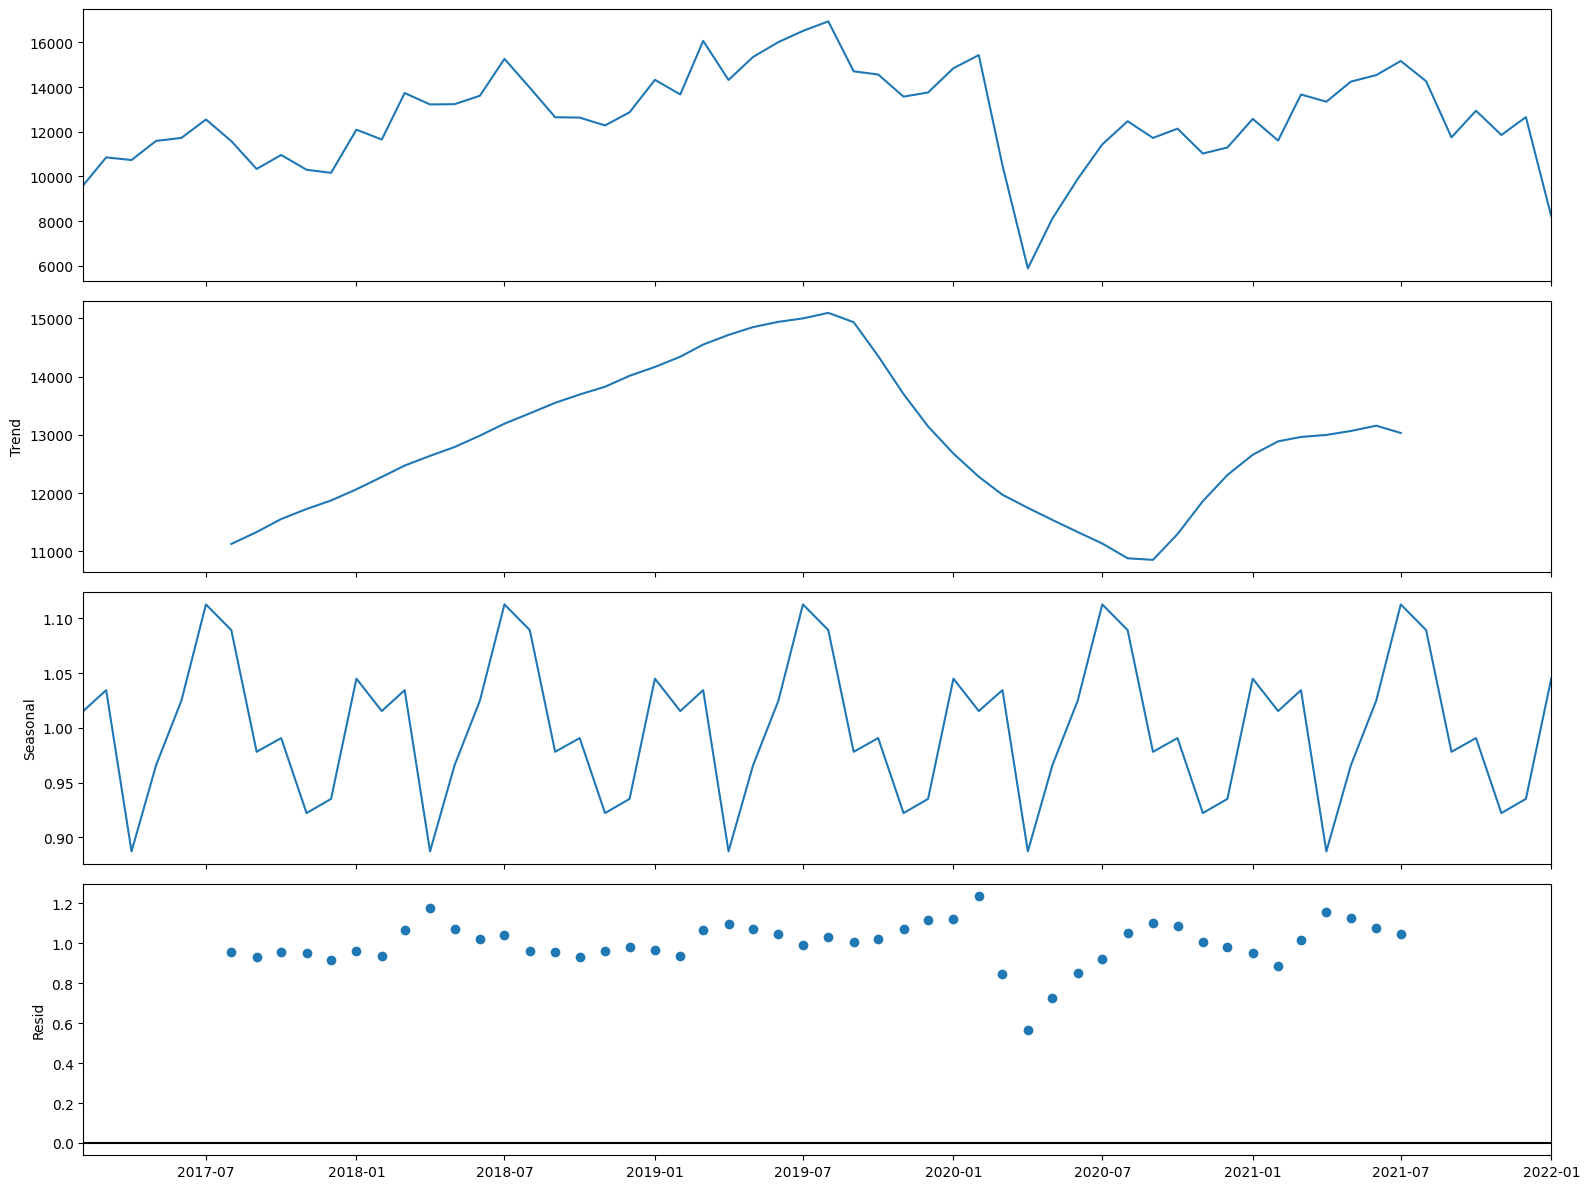

In [41]:
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                  model = 'multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

- Successful businesses, particularly those with higher ratings (above 3.5), exhibit consistent and possibly increasing user engagement over time.
- High-rated restaurants maintain a steady or growing level of user engagement over time, reflecting ongoing customer interest and satisfaction.
- Tip count is showing a downward trend whereas review count is showing an upward trend with time.
- Year starting and year ending from around November and March is highly engaging and seasonal.

In [42]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?

sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) AS avg_rating, SUM(b.review_count) AS review_count,
SUM(s.useful_count) AS useful_count,
SUM(s.funny_count) AS funny_count,
SUM(s.cool_count) AS cool_count
FROM
(SELECT business_id,
    SUM(useful) AS useful_count,
    SUM(funny) AS funny_count,
    SUM(cool) AS cool_count
FROM
    review
GROUP BY business_id) AS s
JOIN business as b ON b.business_id = s.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count
""", conn)

sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [43]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

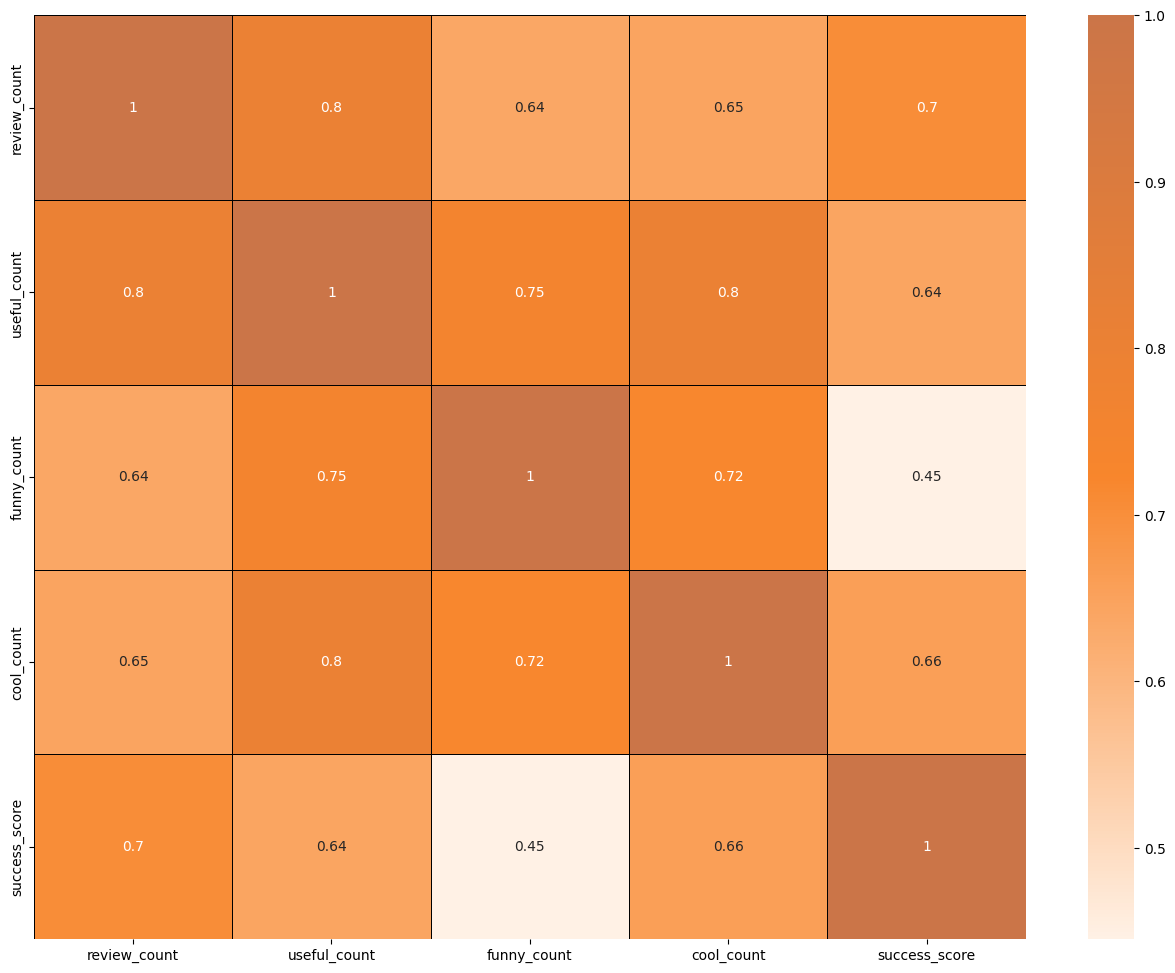

In [44]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot= True, linewidths=0.5, linecolor = 'black')
plt.show()

- 'useful', 'funny', and 'cool' are attributes associated with user reviews. They represent the feedback provided by users about the usefulness, humor, or coolness of a particular review.
- Higher counts of useful, funny, and cool reviews suggest greater user engagement and satisfaction, which are key factors contributing to a restaurant's success.

In [45]:
# Is there any difference in engagement of elite users and non-elite users?

elite_df = pd.read_sql_query("""SELECT 
    elite,
    COUNT(*) AS num_users,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite
;""", conn)

In [46]:
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441.0
1,Not Elite,1896699,26021235.0


<function matplotlib.pyplot.show(close=None, block=None)>

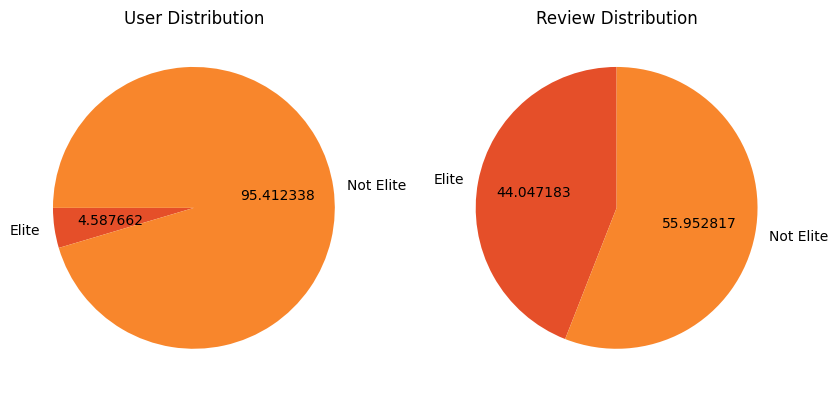

In [47]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], labels = elite_df['elite'], autopct = '%2f', startangle = 180, colors = ['#E54F29', '#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct = '%2f', startangle = 90, colors = ['#E54F29', '#F8862C'])

plt.show

- Elite users are individuals who have been recognized and awarded the "Elite" status by Yelp for their active and high-quality contributions to the platform, such as frequent and detailed reviews, photos, and check-ins, among other criteria.
- Elite users despite being significantly fewer in numbers, contribute a substantial proportion of the total review counts compared to non-elite users.
- Elite users often provide detailed and insightful reviews, which can influence other users' perceptions and decisions regarding a business.
- Reviews from elite users may receive more attention and visibility on the Yelp platform due to their status potentially leading to higher exposure of businesses.
- Establishing a positive relationship with elite users can lead to repeat visits and loyalty, as they are more likely to continue supporting businesses they have had good experiences with.

In [48]:
# What are the busiest hours of restaurants?

review_engagement = pd.read_sql_query("""SELECT
  HOUR(date) AS hour,
  COUNT(*) AS review_count
FROM review
GROUP By hour
""", conn)

tip_engagement = pd.read_sql_query("""SELECT
  HOUR(date) AS hour,
  COUNT(*) AS tip_count
FROM tip
GROUP By hour
""", conn)



In [49]:
checkin = pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").hour for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

<BarContainer object of 24 artists>

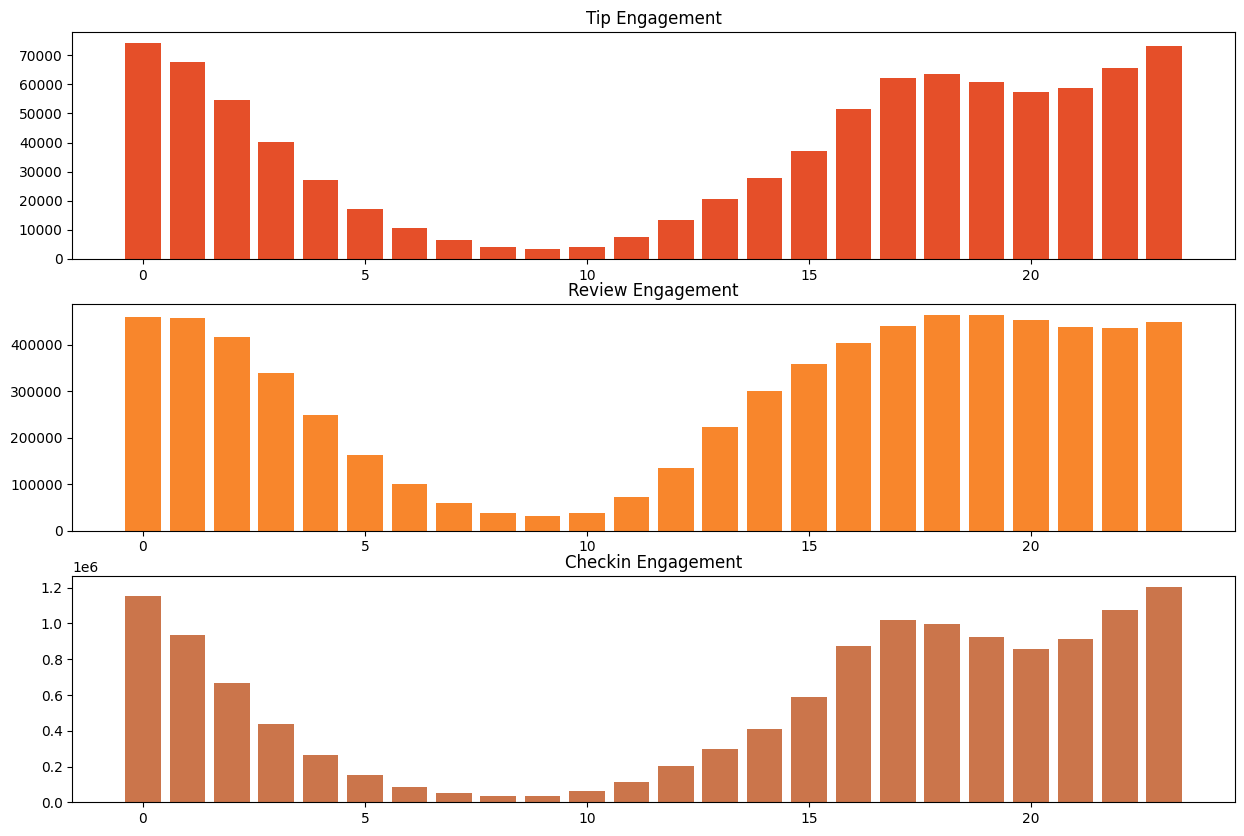

In [53]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color = '#E54F29')

plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color = '#F8862C')

plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color = '#CB754B')

- The busiest hours for restaurants based on user engagement, span from 4:00 PM to 1:00 AM.
- Knowing the peak hours allows businesses to optimise their staffing levels and resource allocation during these times to ensure efficient operations and quality service delivery.
- The concentration of user engagement during the evening and night hours suggests a higher demand for dining out during these times, potentially driven by factors such as work schedules, social gatherings, and leisure activities.

# Recommendations

- Utilizing insights from the analysis of various metrics such as user engagement, sentiment of reviews, peak hours, and the impact of elite users, businesses can make informed decisions to drive success.
- understanding customer preferences, behavior, and satisfaction level is paramount. Businesses should focus on delivering exceptional experiences to meet customer expectations.
- By leveraging data on peak hours and user engagement, businesses can optimize staffing levels resource allocation, and operating hours to ensure efficiency and quality service delivery during high-demand periods.
- Positive reviews from elite users and high user engagement can boost a business's online visibility and reputation. Maintaining active engagement with customers and responding promptly to feedback is crucial for building credibility and attracting new customers.
- Collaborating with users and leveraging their influence can amplify promotional efforts, increase brand awareness, and drive customer acquisition. Building strong relationships with key stakeholders, including loyal customers, and further strengthens our business's position in the market.
- Businesses can adjust their operating hours or introduce special promotions to capitalize on the increased demand during peak hours.
- Less successful businesses may need to focus on strategies to enhance user engagement over time, such as improving service quality and responding to customer feedback.
- Cities with high success scores present opportunities for restaurant chains to expand or invest further.